### Estimadores

In [2]:
est_avg = function(ms) {
    return (2 * mean(ms))
}

est_max = function(ms) {
    return(max(ms))
}

In [3]:
my_ms = c(1.17,1.75,0.28,2.56,2.36,0.36,1.82,0.24,1.17,1.86)

print(c('ext_avg', est_avg(my_ms)), quote=F)
print(c('ext_max', est_max(my_ms)), quote=F)

[1] ext_avg 2.714  
[1] ext_max 2.56   


In [40]:
Nrep = 1000
ns = c(5, 30, 50)
muestras = lapply(1:Nrep, function(x) runif(max(ns), 0, 3))

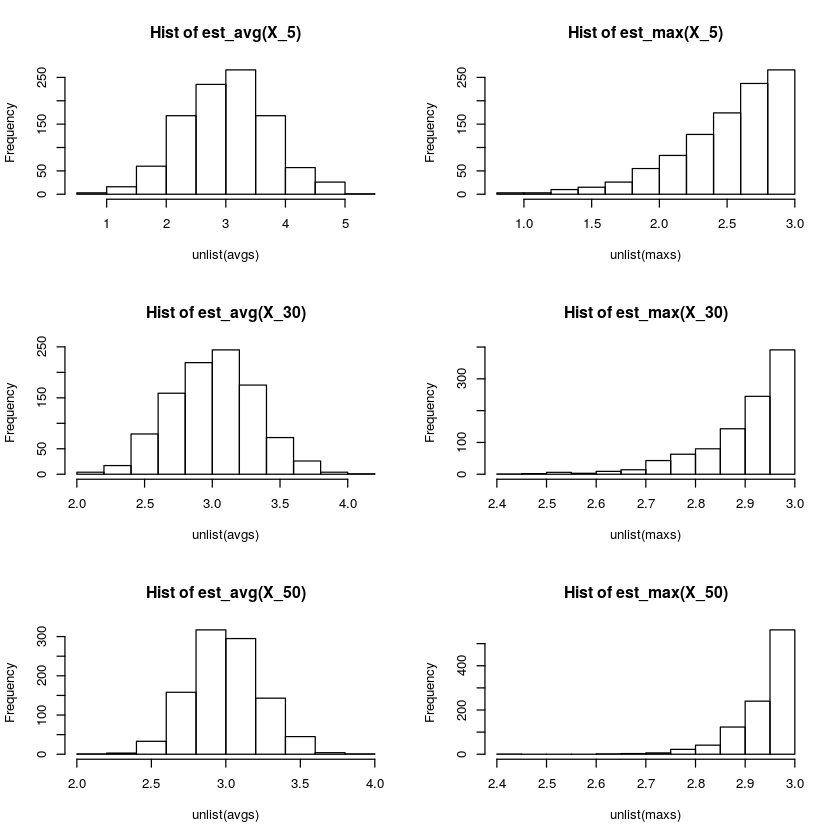

In [95]:
par(mfrow=c(length(ns), 2))
for (n in ns) {
    avgs = lapply(muestras, function(x) est_avg(x[1:n]))
    maxs = lapply(muestras, function(x) est_max(x[1:n]))
    hist(unlist(avgs), main=paste(c("Hist of est_avg(X_", n, ")"), sep="", collapse=""), freq=T)
    hist(unlist(maxs), main=paste(c("Hist of est_max(X_", n, ")"), sep="", collapse=""), freq=T)
}

### Ejercicio 5

In [96]:
ns = c(5, 30, 50, 100, 500)
muestras = matrix(NA, Nrep, max(ns))
for (i in 1:Nrep) {
    muestras[i,] = runif(max(ns), 0, 3)
}

In [112]:
emce = function(est) sapply(ns, function(n) mean(sapply(1:Nrep, function(row) (est(muestras[row,1:n]) - 3) ** 2)))

In [113]:
emce_max = emce(est_max)
emce_avg = emce(est_avg)

In [114]:
mses<-data.frame(rbind(emce_max,emce_avg))
colnames(mses)<-ns
rownames(mses)<-c("max","avg")

In [115]:
mses

,5,30,50,100,500
max,0.3959037,0.01765522,0.006427522,0.001745778,0.0000772452
avg,0.5970518,0.09380441,0.058827364,0.030379095,0.0058197457


## Intervalos de confianza